#**Census Income Prediction**

#**Project Description**

---

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#**Importing Required Libraries**

In [1]:
# Importing necessary libraries >>

# For dealing with Dataframe >>
import pandas as pd
# For Dealing with Calculations >>
import numpy as np
# For dealing with Graphs >>
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 3.0 MB/s eta 0:00:00


#**Load the Data**

In [2]:
# Load the dataset into df variable >>
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')



#**Explore the Data**

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Check the Shape of train Dataset >>
print("[$] Rows Of Dataset >> ",df.shape[0])
print("[$] Columns Of Dataset >> ",df.shape[1])

[$] Rows Of Dataset >>  32560
[$] Columns Of Dataset >>  15


In [5]:
# Information of Dataset >> to get information about Columns & thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",df.isnull().sum().sum())
print("-"*70)
df.isnull().sum()

[$] Null Values >>  0
----------------------------------------------------------------------


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
# Get statistical distribution of the dataset >>
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


#**Data Cleaning**

In [8]:
# Getting categorical & Numerical feauters >>
Categorical_columns = df.select_dtypes(include=['object']).columns
Numerical_Columns = df.select_dtypes(include=['number']).columns

In [9]:
print("[$] Categorical Columns >> ",Categorical_columns.tolist())
print("[$] Numerical Columns >> ",Numerical_Columns.tolist())

[$] Categorical Columns >>  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
[$] Numerical Columns >>  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [13]:
df.drop('Education', inplace=True, axis=1)
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

We have dropped the education feature. Which is a duplicate feature of education_num, but in a nonnumerical format.
The matching education level of the education number:

1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,

10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

#**EDA**

<AxesSubplot:ylabel='Income'>

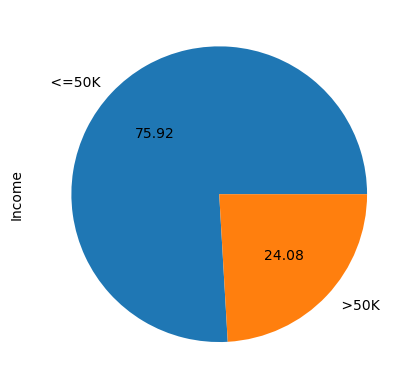

In [15]:
df['Income'].value_counts().plot(kind='pie',autopct='%.2f')

# >> Income feature has 75.92% of population is having income less than 50000 & 24.08% earn more than 50000
# >> So It's imbalanceness in target feature

<AxesSubplot:xlabel='Age', ylabel='count'>

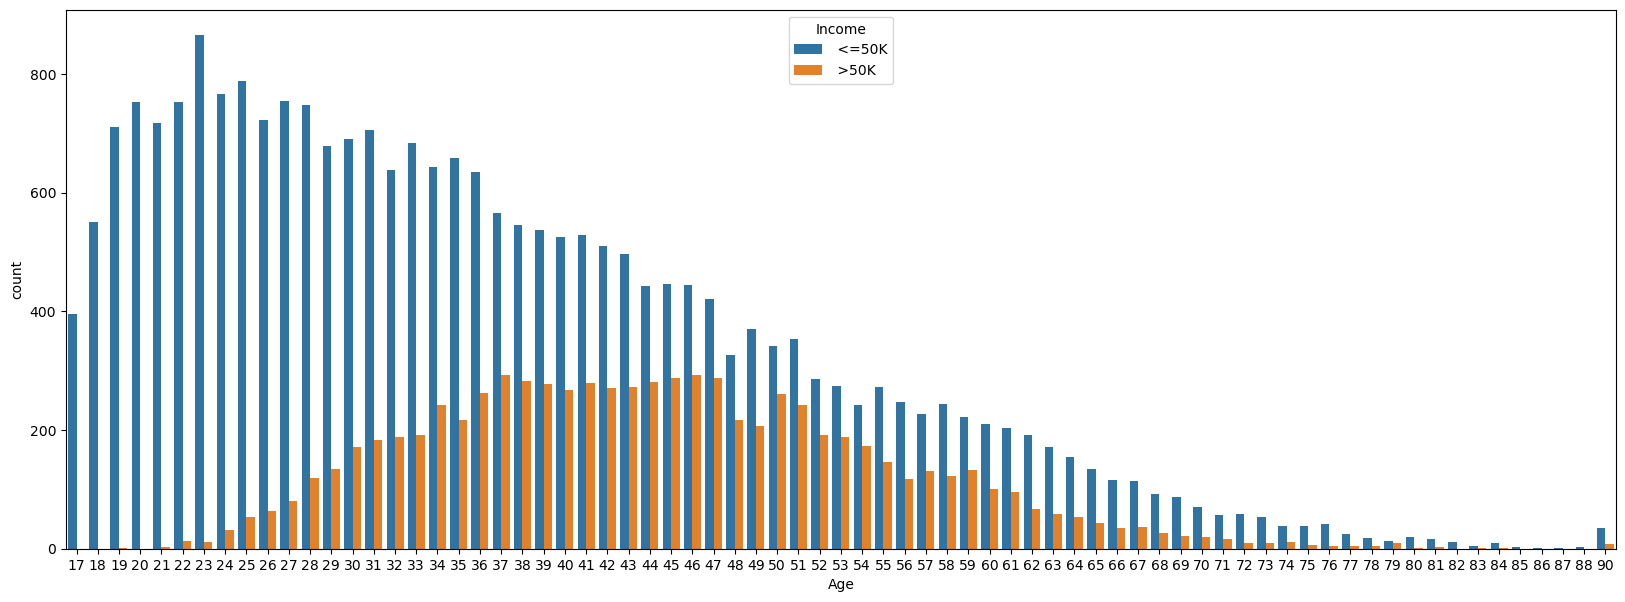

In [21]:
plt.figure(figsize=(20, 7))
sns.countplot(x='Age',data=df,hue='Income')



<AxesSubplot:xlabel='Education_num', ylabel='count'>

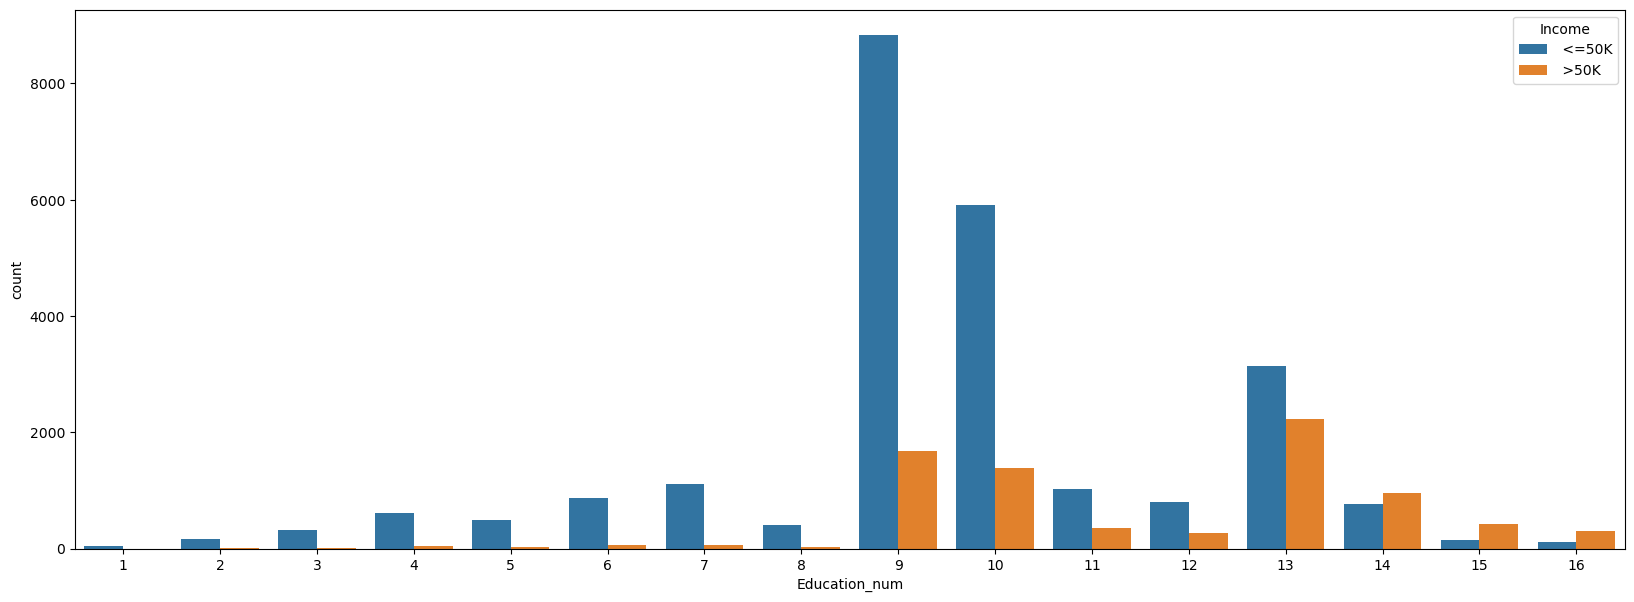

In [24]:
plt.figure(figsize=(20, 7))
sns.countplot(x='Education_num',data=df,hue='Income')
#We see heavy concentration in 9th and 10th years of  education

<AxesSubplot:ylabel='Relationship'>

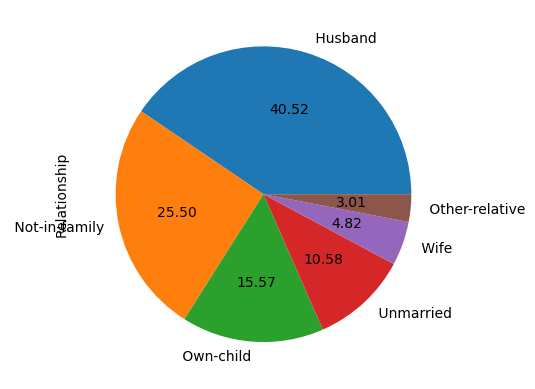

In [25]:
df['Relationship'].value_counts().plot(kind='pie',autopct='%.2f')


<AxesSubplot:xlabel='Race', ylabel='count'>

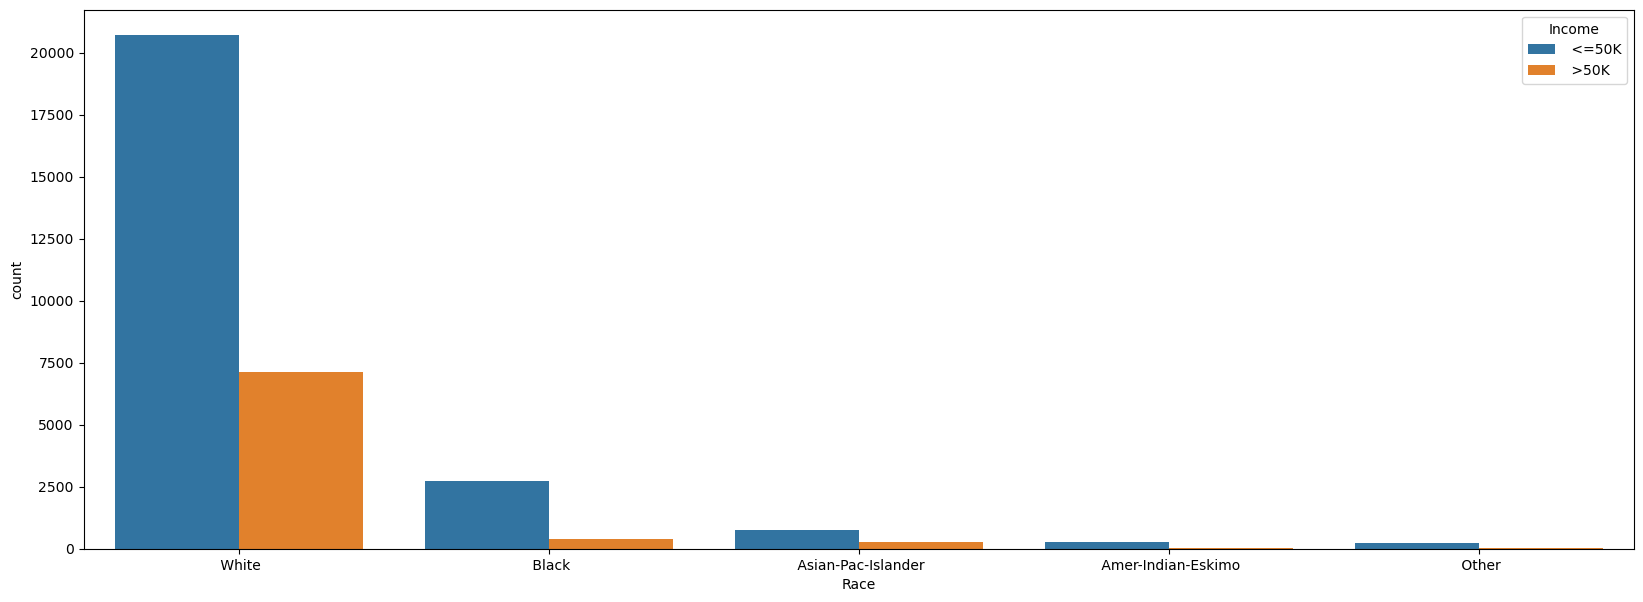

In [28]:
plt.figure(figsize=(20, 7))
sns.countplot(x='Race',data=df,hue='Income')

# >> We can see whites are major contributors in both groups

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

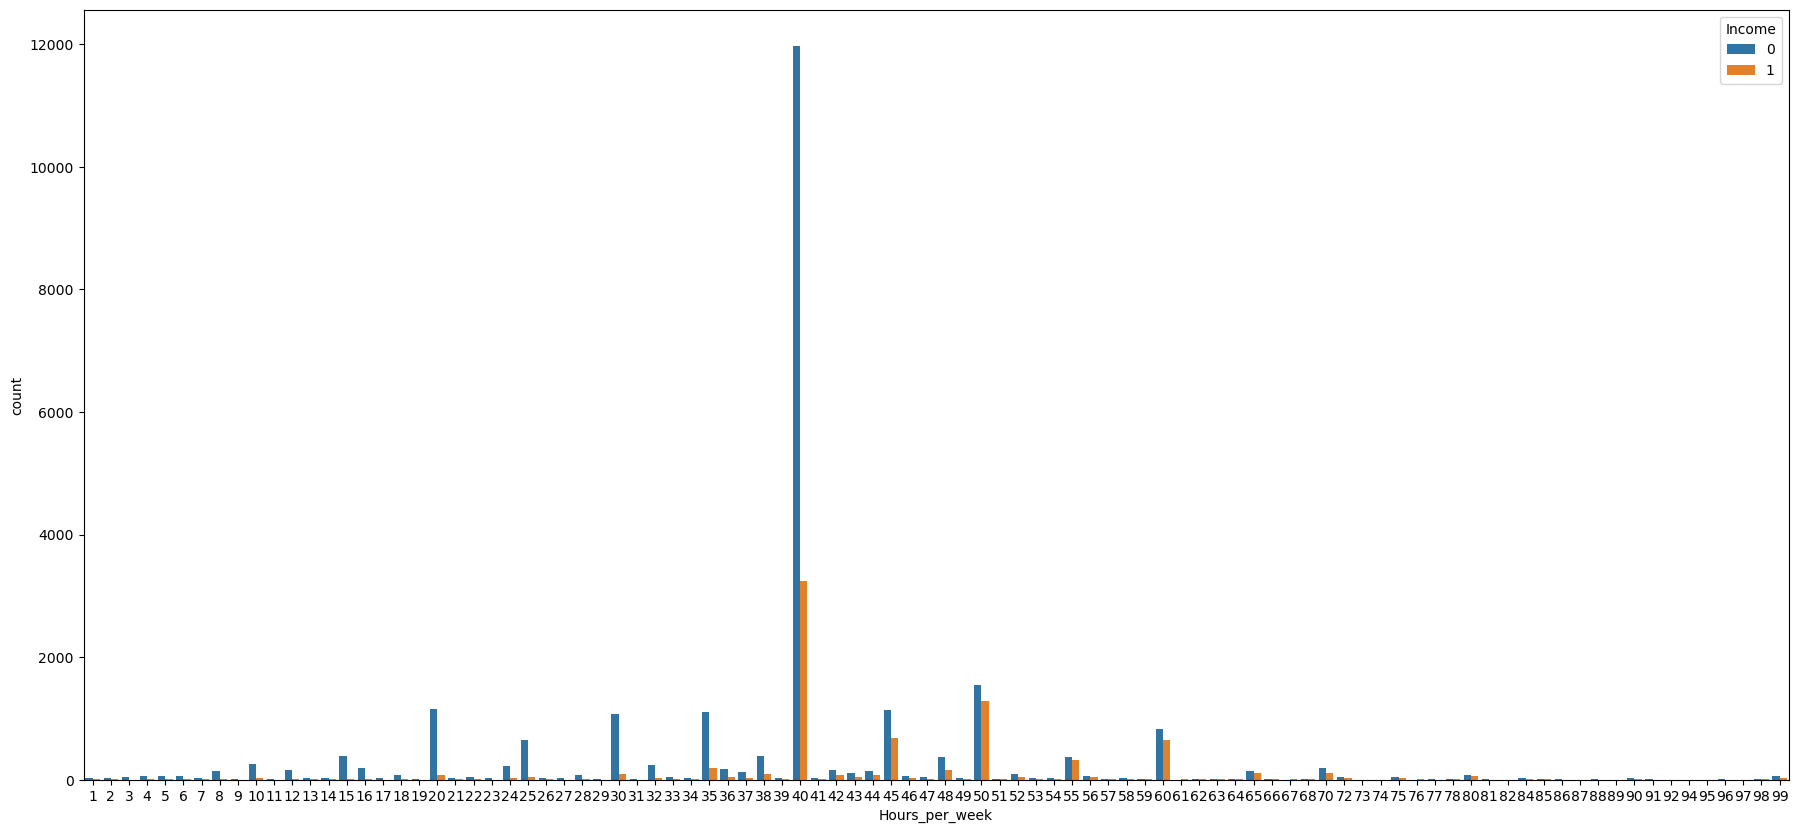

In [35]:
plt.figure(figsize=(22,10))
sns.countplot(x='Hours_per_week',data=df,hue='Income')

# >> We can see 40 hours per week people have more incomes

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df['Income'] = le.fit_transform(df['Income'])

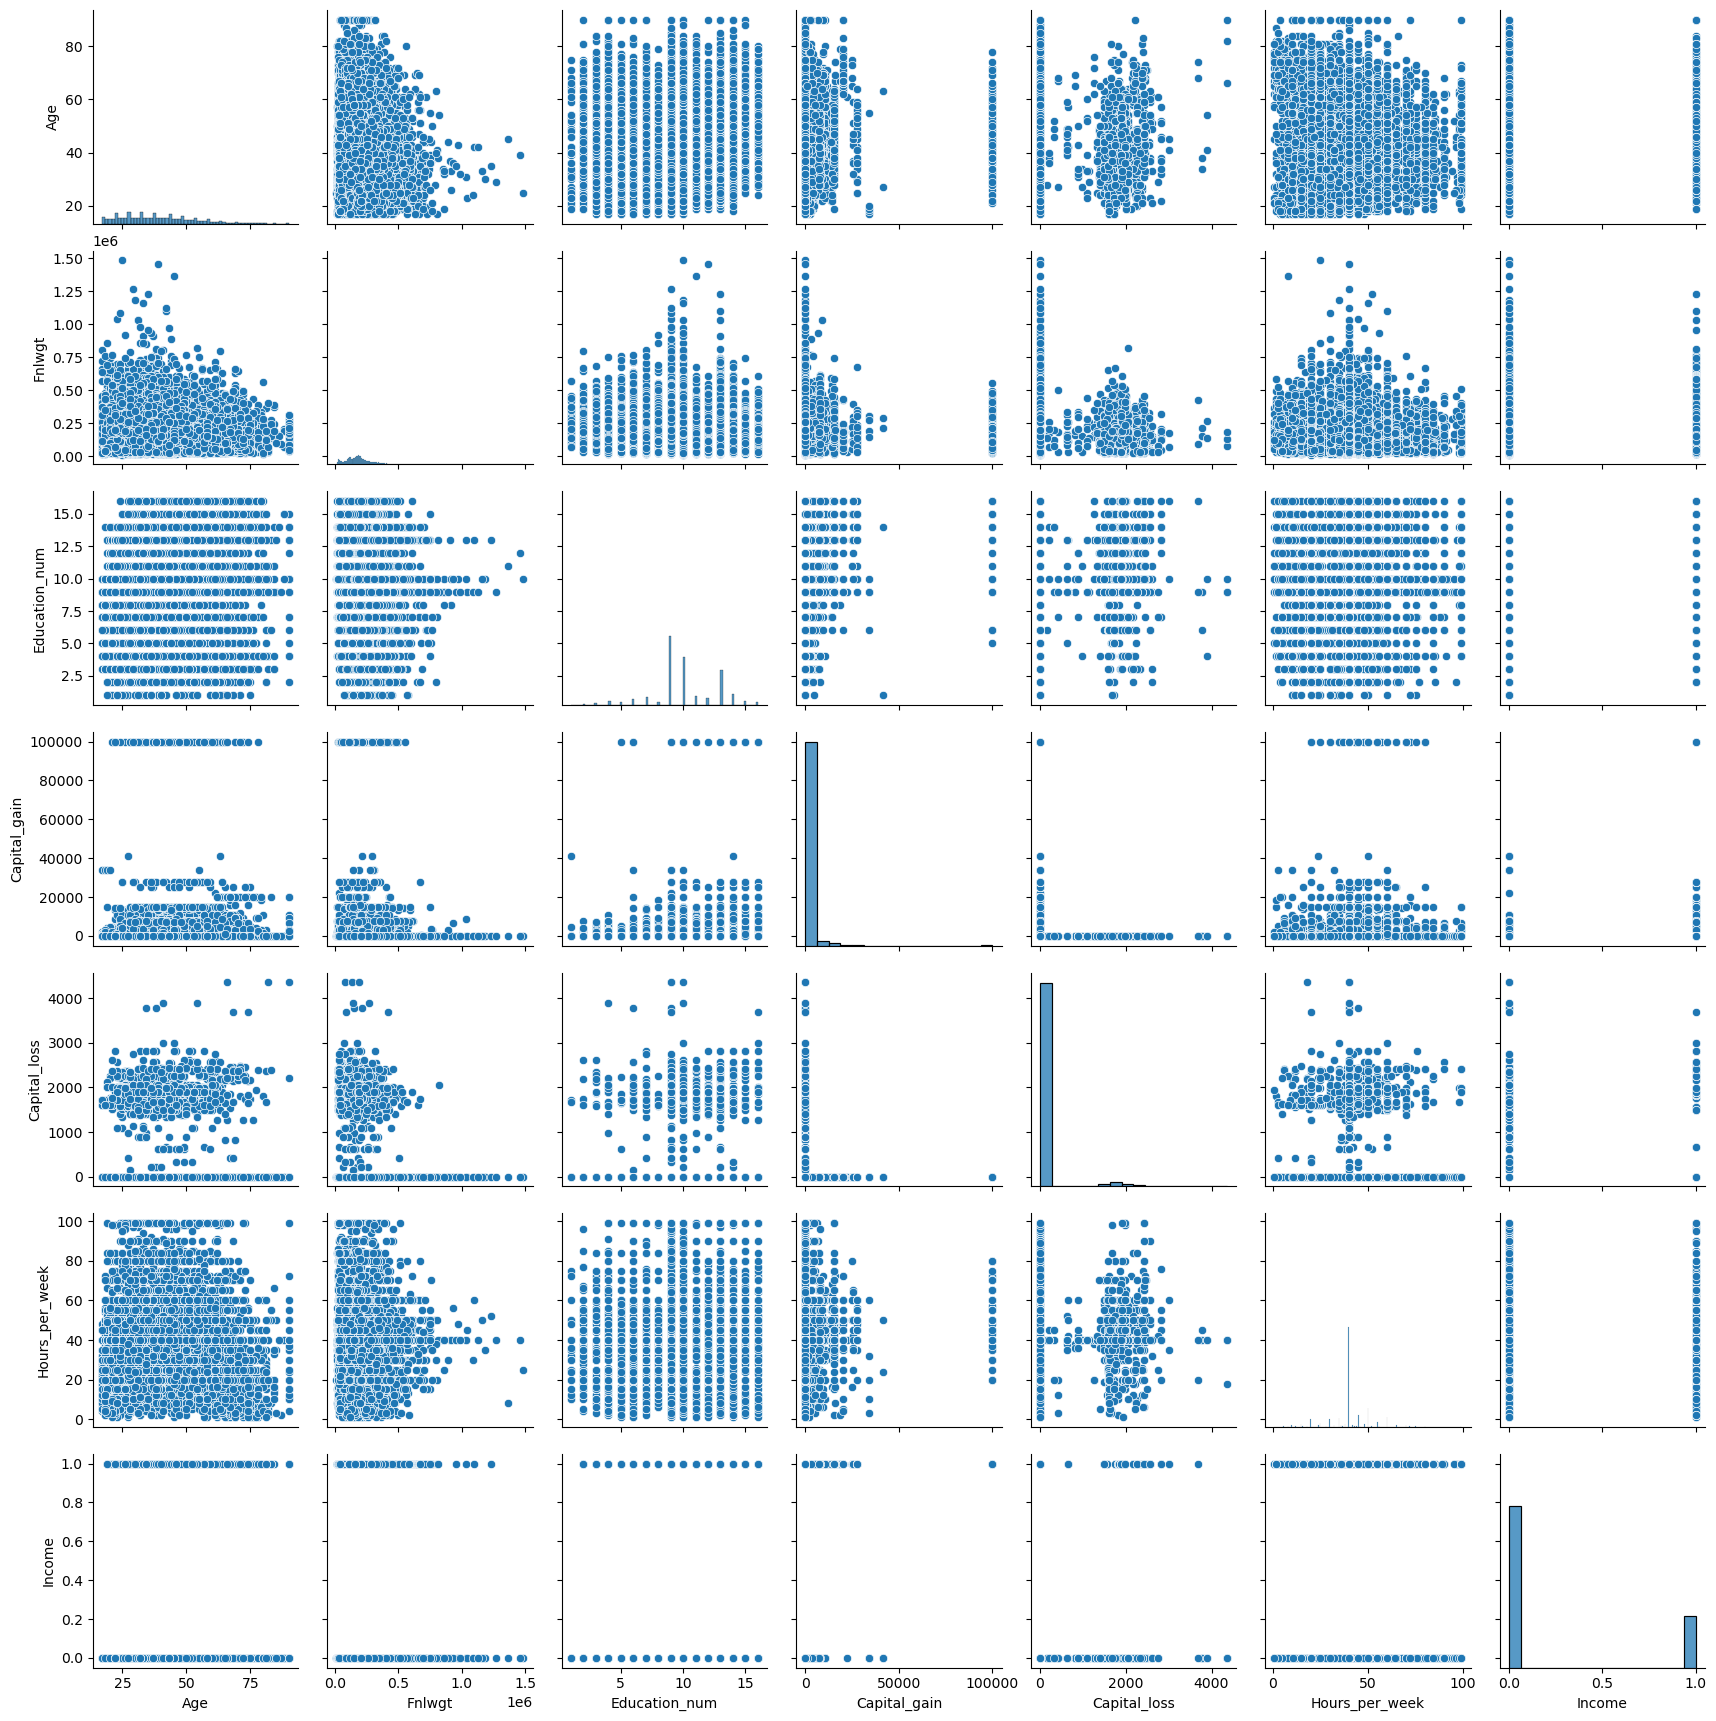

In [33]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

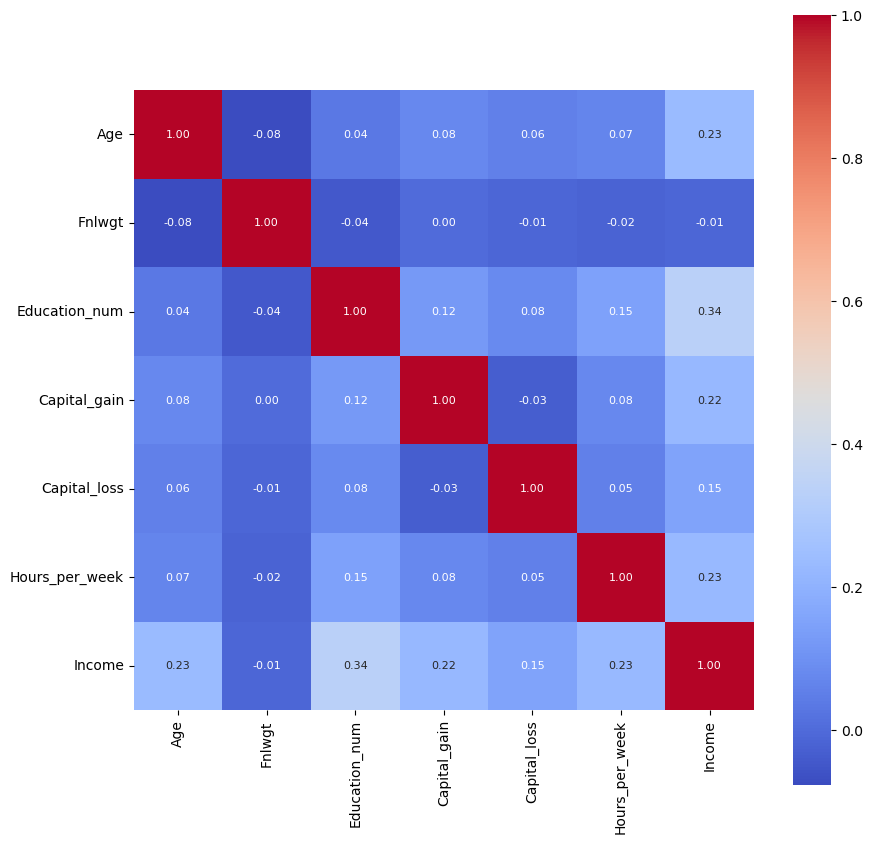

In [36]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt=".2f",annot=True,annot_kws={"size":8},cmap="coolwarm")
plt.show()
#we can see that Income is positively correlated with education,age,hours per week and capital gain.

#**Data Preprocessing**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education_num   32560 non-null  int64 
 4   Marital_status  32560 non-null  object
 5   Occupation      32560 non-null  object
 6   Relationship    32560 non-null  object
 7   Race            32560 non-null  object
 8   Sex             32560 non-null  object
 9   Capital_gain    32560 non-null  int64 
 10  Capital_loss    32560 non-null  int64 
 11  Hours_per_week  32560 non-null  int64 
 12  Native_country  32560 non-null  object
 13  Income          32560 non-null  int32 
dtypes: int32(1), int64(6), object(7)
memory usage: 3.4+ MB


In [38]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [40]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0


In [41]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#**Data Splitting**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the training data into features and target variable
X = df.drop('Income', axis=1)
y = df['Income']


In [49]:
#Tackling Imbalance
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [50]:
y1.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [53]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x1, y1, test_size=0.2, random_state=42)

#**Model Building**

In [58]:
from xgboost import XGBClassifier

In [60]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

In [61]:
# Train and evaluate models
for name, model in models.items():
    print("-"*70)
    print(f"Training and evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report of {name}:\n{report}\n")
print("-"*70)

----------------------------------------------------------------------
Training and evaluating Logistic Regression...


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.66
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      4943
           1       0.69      0.58      0.63      4945

    accuracy                           0.66      9888
   macro avg       0.66      0.66      0.65      9888
weighted avg       0.66      0.66      0.65      9888


----------------------------------------------------------------------
Training and evaluating Random Forest...
Accuracy of Random Forest: 0.88
Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4943
           1       0.88      0.89      0.88      4945

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888


----------------------------------------------------------------------
Train

In [ ]:
#we see that XGBoost has the best accuracy .